In [77]:
import shap
import joblib
import pandas as pd

model = joblib.load(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\backend\resources\model_LGB.joblib")
client_id = 100001

data_test = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_test_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")

data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR")

client_df = data_test[data_test.index == client_id]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(client_df)
expected_values = explainer.expected_value

print(expected_values)

Trying to unpickle estimator LabelEncoder from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


[2.9474512818708796, -2.9474512818708796]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [78]:
from json import JSONEncoder
import numpy
import json


class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [79]:
numpyData = {"array": shap_values}
encodedNumpyData = json.dumps(numpyData, cls=NumpyArrayEncoder)  # use dump() to write array into file
# return encodedNumpyData

response = {"expected_value": expected_values,
            "shap_values": encodedNumpyData}

In [80]:
# Deserialization
print("Decode JSON serialized NumPy array")
decodedArrays = json.loads(encodedNumpyData)

finalNumpyArray = numpy.asarray(decodedArrays["array"])
print("NumPy Array")
print(finalNumpyArray)

Decode JSON serialized NumPy array
NumPy Array
[[[-1.46711596e-01 -5.07538082e-03 -6.25014641e-04 ...  0.00000000e+00
   -5.93327774e-04 -1.31925901e-04]]

 [[ 1.46711596e-01  5.07538082e-03  6.25014641e-04 ...  0.00000000e+00
    5.93327774e-04  1.31925901e-04]]]


In [81]:
response

{'expected_value': [2.9474512818708796, -2.9474512818708796],
 'shap_values': '{"array": [[[-0.14671159560955704, -0.005075380821287493, -0.0006250146411445615, -0.00029715164338830287, 0.007635641900824451, -0.025824499946720172, 0.04977897047071447, -0.08186659654213997, -0.02715661517835538, 0.0155535622338104, -0.004733945891489838, 0.0030861440291109748, -0.024248621905208666, -0.08288032116177425, 0.0, 0.0, 0.012106763481381662, 0.0, -0.006211897504386859, -0.00044321773403714924, 6.225459414668105e-05, 0.0015198553853375746, -0.0005106679471363852, 0.039781592462061664, 0.0, 0.0, -2.6462598792030274e-05, 0.007945393782069475, -4.12883354059065e-06, 0.00043047564029491815, 0.44240877571287046, 0.8242626920337555, -0.7284135960836721, 0.0011125813146732773, -0.0015935943525166873, -0.0020792976990557208, -0.0002478560760619735, -6.104528624217426e-05, 0.0022781258633932243, 0.001660489596464672, -0.0043200902521955105, 0.00012038528742066693, 0.0007916354356187861, 0.0004936175571

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import joblib

In [83]:
prediction = 0

In [84]:
def shap_force_plot(shap_values, expected_value, prediction, client_df):
    """
    :expected_value: (array)
    """

    plt.rcParams['figure.autolayout'] = True

    shap.force_plot(np.around(expected_value[prediction], decimals=2),
                    np.around(shap_values[prediction], decimals=2),
                    np.around(client_df, decimals=2),
                    matplotlib=True,
                    show=False,
                    text_rotation=15,
                    figsize=(20, 6))
    plt.show()


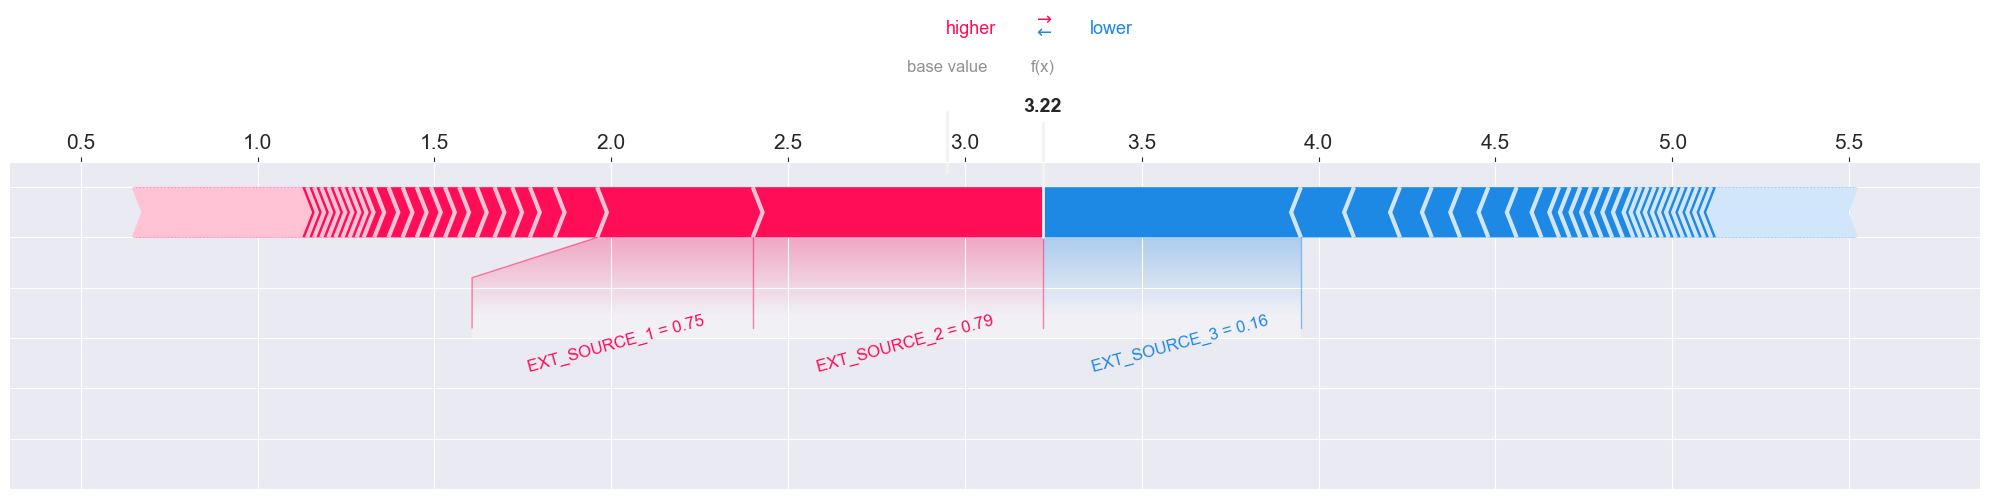

In [85]:
shap_force_plot(finalNumpyArray, expected_values, prediction, client_df)


In [86]:
columns = client_df.columns

In [87]:
columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'CC_NAME_CONTRACT_STATUS_Sent proposal_MAX',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_MEAN',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_SUM',
       'CC_NAME_CONTRACT_STATUS_Sent proposal_VAR',
       'CC_NAME_CONTRACT_STATUS_Signed_MIN',
       'CC_NAME_CONTRACT_STATUS_Signed_MAX',
       'CC_NAME_CONTRACT_STATUS_Signed_MEAN',
       'CC_NAME_CONTRACT_STATUS_Signed_SUM',
       'CC_NAME_CONTRACT_STATUS_Signed_VAR', 'CC_COUNT'],
      dtype='object', length=777)

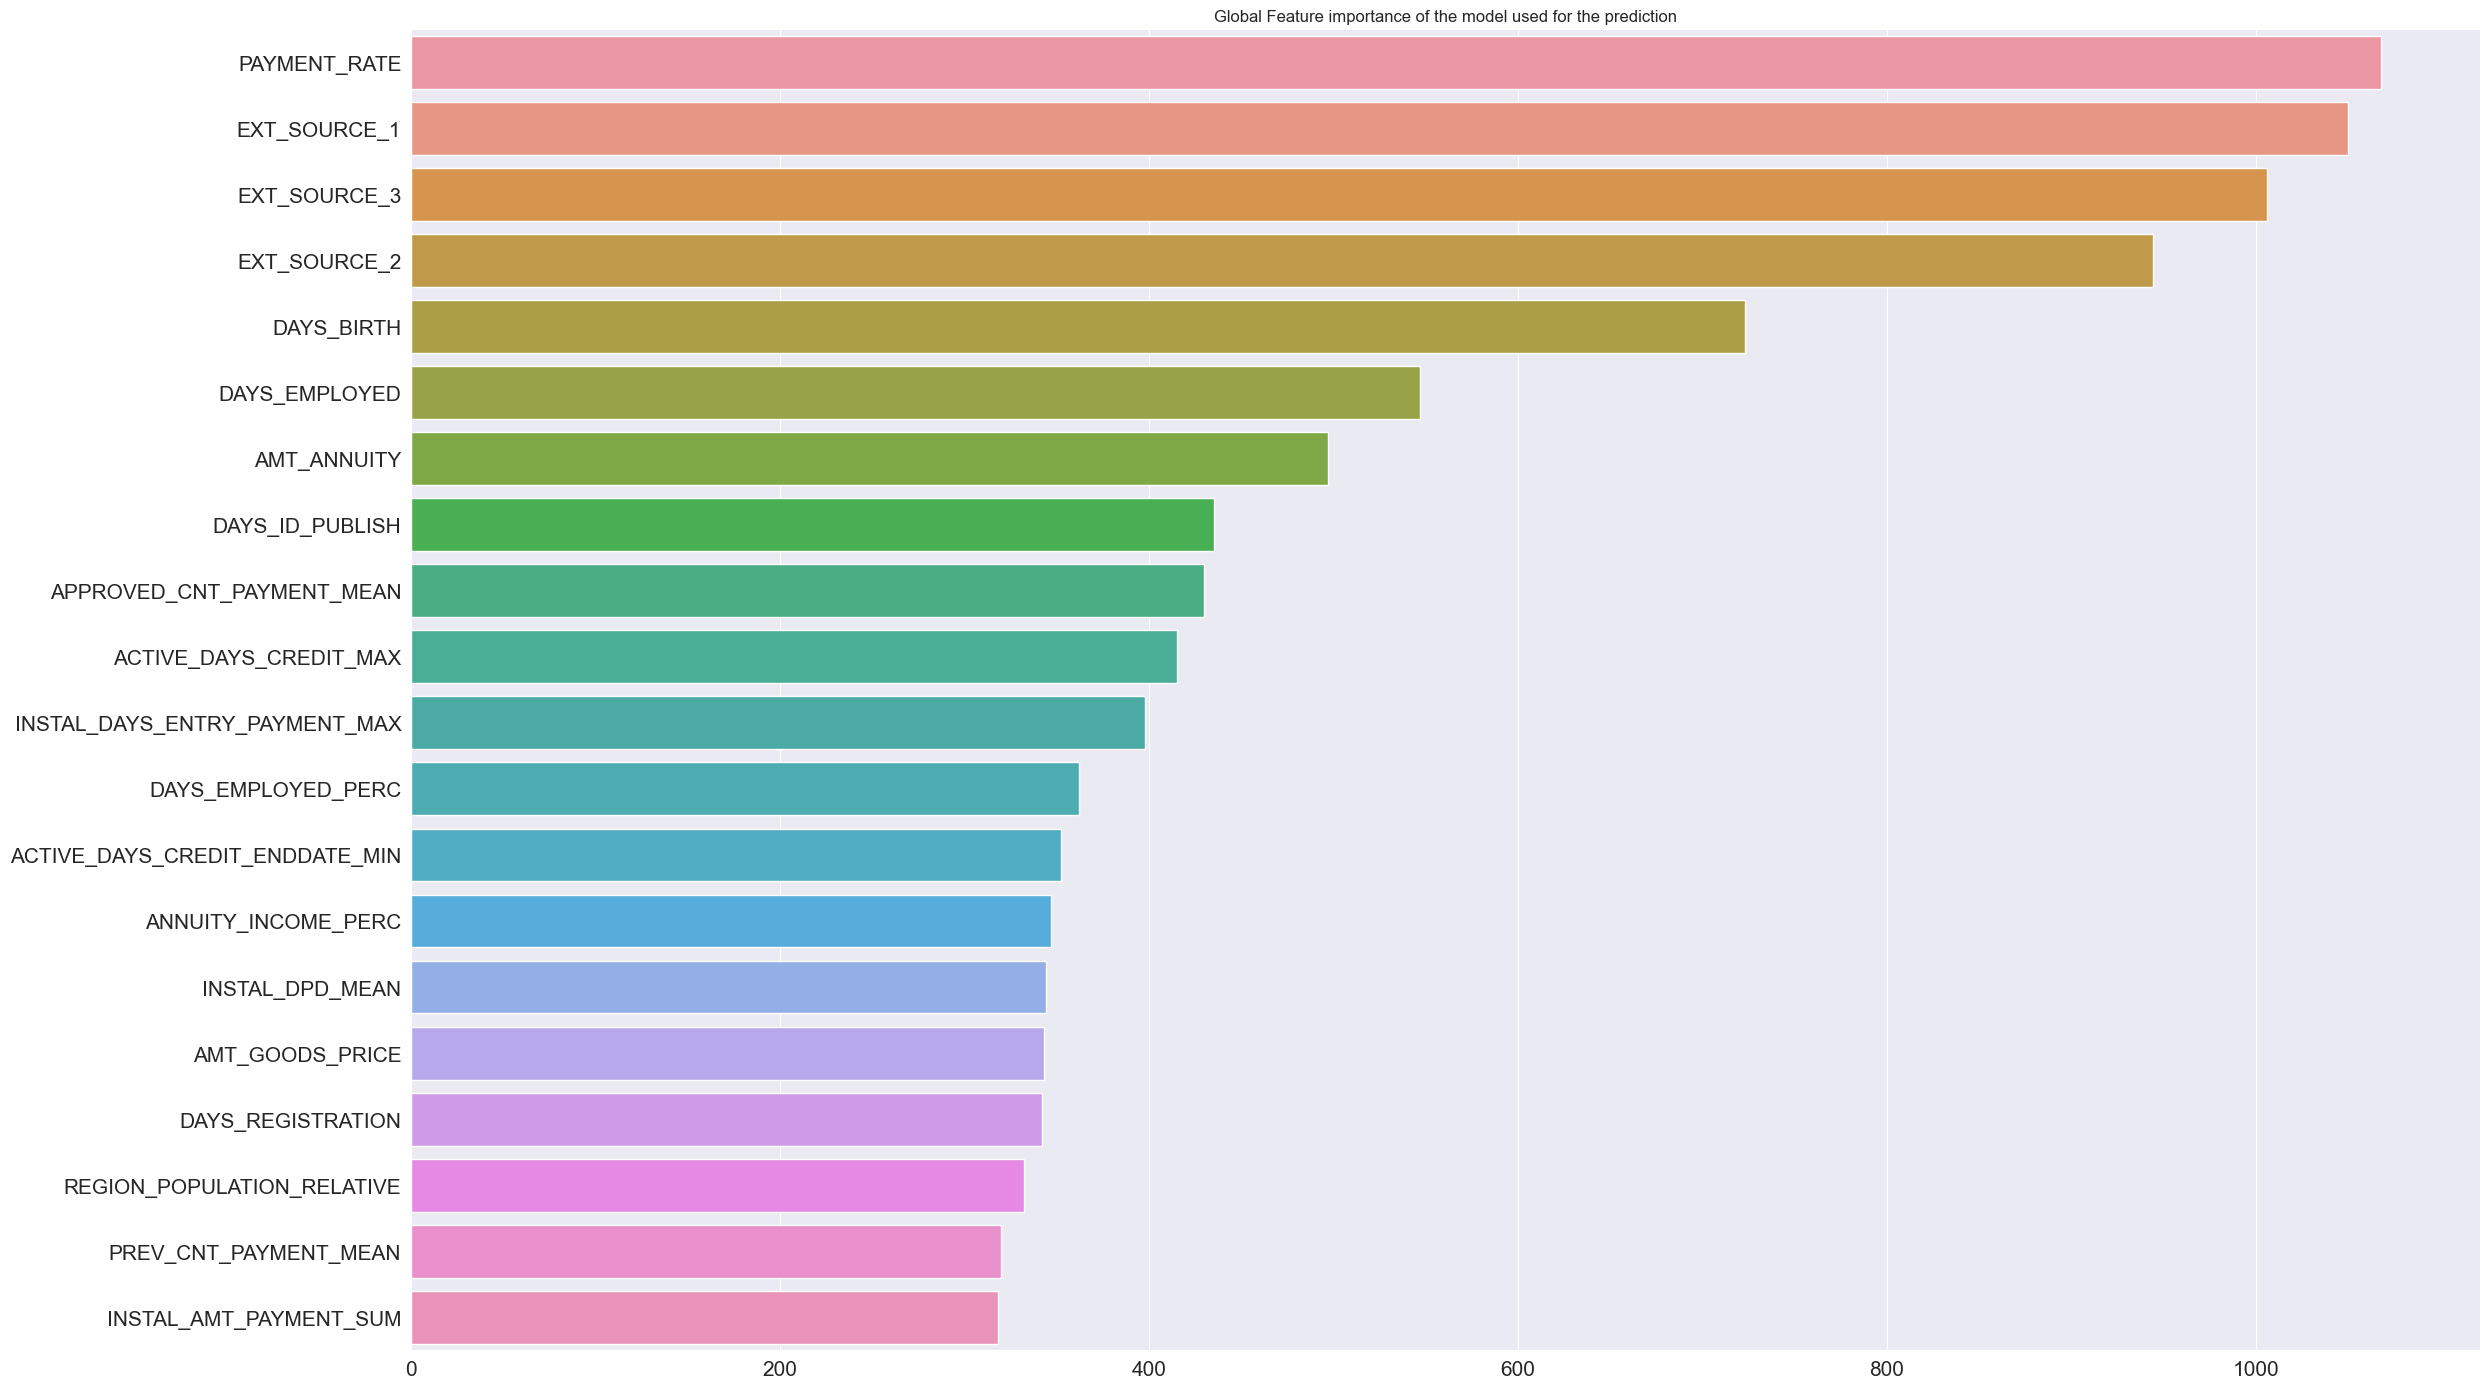

In [88]:
    # create dict {columns_name:model_feature_importance}
max_features_to_display = 20

dict_f_i = dict(zip(columns.tolist(), model.feature_importances_.tolist()))
# sorted by feature_importance
dict_f_i = {k: v for k, v in sorted(dict_f_i.items(), key=lambda item: item[1], reverse=True)}
# return barplot
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize=(25, 14))
matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)
fig = sns.barplot(x=list(dict_f_i.values())[:max_features_to_display],
                  y=list(dict_f_i.keys())[:max_features_to_display])
fig.set(title="Global Feature importance of the model used for the prediction")

plt.show()

In [89]:
dict_f_i

{'PAYMENT_RATE': 1068,
 'EXT_SOURCE_1': 1050,
 'EXT_SOURCE_3': 1006,
 'EXT_SOURCE_2': 944,
 'DAYS_BIRTH': 723,
 'DAYS_EMPLOYED': 547,
 'AMT_ANNUITY': 497,
 'DAYS_ID_PUBLISH': 435,
 'APPROVED_CNT_PAYMENT_MEAN': 430,
 'ACTIVE_DAYS_CREDIT_MAX': 415,
 'INSTAL_DAYS_ENTRY_PAYMENT_MAX': 398,
 'DAYS_EMPLOYED_PERC': 362,
 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN': 352,
 'ANNUITY_INCOME_PERC': 347,
 'INSTAL_DPD_MEAN': 344,
 'AMT_GOODS_PRICE': 343,
 'DAYS_REGISTRATION': 342,
 'REGION_POPULATION_RELATIVE': 332,
 'PREV_CNT_PAYMENT_MEAN': 320,
 'INSTAL_AMT_PAYMENT_SUM': 318,
 'AMT_CREDIT': 316,
 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN': 306,
 'INSTAL_DBD_SUM': 306,
 'APPROVED_DAYS_DECISION_MAX': 290,
 'INSTAL_AMT_PAYMENT_MIN': 286,
 'DAYS_LAST_PHONE_CHANGE': 282,
 'CLOSED_DAYS_CREDIT_MAX': 276,
 'BURO_DAYS_CREDIT_MAX': 264,
 'OWN_CAR_AGE': 262,
 'CLOSED_DAYS_CREDIT_VAR': 262,
 'INSTAL_DBD_MAX': 260,
 'ACTIVE_AMT_CREDIT_SUM_SUM': 257,
 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN': 256,
 'POS_MONTHS_BALANCE_SIZE': 255,
 'INCOME

In [147]:
list_features = list(dict_f_i.keys())[:10]


In [91]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX']

In [92]:
title = "This graph allows you to visualize the distribution of the selected features, separated in relation to credit accepted or refused and compared with the customer's data. \n The average is the black line while the customer data in red"


In [93]:
title

"This graph allows you to visualize the distribution of the selected features, separated in relation to credit accepted or refused and compared with the customer's data. \n The average is the black line while the customer data in red"

In [117]:
mapping_x_ticks = {
    '1': 'Default Client',
    '0': 'Not Default Client'
}


def create_box_plot(data, feature:str, feature_value:float):
    fig, ax = plt.subplots(figsize=(12, 9))
    # create boxplot
    sns.boxplot(data=data[~data.TARGET.isna()],
                y=feature,
                x='TARGET',
                orient="v",
                showfliers = False,
                palette=["#4286DE", "#EA365B"])
    # add client treshshold
    ax.axhline(feature_value,
               color='r',
               label='Client value')
    # add label and legend
    ax.legend()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [mapping_x_ticks[i] for i in labels]
    ax.set_xticklabels(labels)
    ax.set_title(f'{feature}')
    ax.title.set_size(20)

    plt.show()

In [97]:
data_train.shape

(307507, 778)

In [100]:
data = data_train[~data_train.TARGET.isna()]
data.shape

(307507, 778)

(307507, 778)

In [122]:
feature = "PAYMENT_RATE"

In [126]:
data_train = pd.read_csv(
    r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz",
    index_col="SK_ID_CURR", usecols=[feature, "SK_ID_CURR"])

In [127]:
data_train

,PAYMENT_RATE
SK_ID_CURR,
100002,0.060749
100003,0.027598
100004,0.050000
100006,0.094941
100007,0.042623
...,...
456251,0.108198
456252,0.044524
456253,0.044239


In [113]:
feature_value = client_df[feature].values[0]
feature_value

0.0361471518987341

['0', '1']
['Not Default Client', 'Default Client']


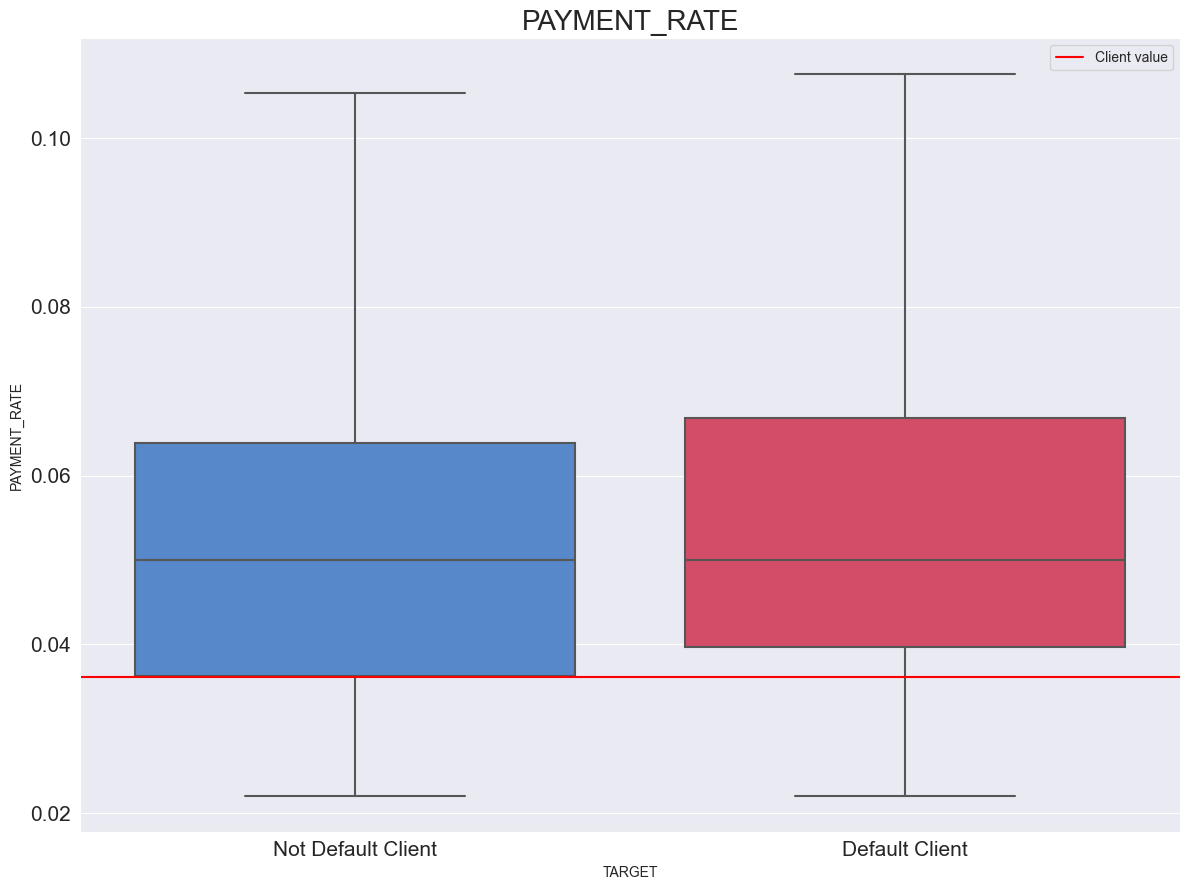

In [121]:
fig, ax = plt.subplots(figsize=(12, 9))
# create boxplot
sns.boxplot(data=data_train,
            y=feature,
            x='TARGET',
            orient="v",
            showfliers=False,
            palette=["#4286DE", "#EA365B"])
# add client treshshold
ax.axhline(feature_value,
           color='r',
           label='Client value')
# add label and legend
ax.legend()
labels = [item.get_text() for item in ax.get_xticklabels()]
print(labels)
labels = [mapping_x_ticks[i] for i in labels]
print(labels)
ax.set_xticklabels(labels)
ax.set_title(f'{feature}')
ax.title.set_size(20)

plt.show()

In [132]:

def boxplot_all_clients_compared_to_client_feature_value(data_all_clients, feature, client_df):
    """
    Positions the client
    """
    mapping_x_ticks = {
        '1': 'Default Client',
        '0': 'Non Default Client'
    }
    feature_value = client_df[feature].values[0]  # we get the value for the client's feature

    fig, ax = plt.subplots(figsize=(12, 9))
    # create boxplot
    sns.boxplot(data=data_all_clients,
                y=feature,
                x='TARGET',
                orient="v",
                showfliers=False,
                palette=["#4286DE", "#EA365B"])
    # add client threshold
    ax.axhline(feature_value,
               color='r',
               label='Client value')
    # add label and legend
    ax.legend()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    print(labels)
    labels = [mapping_x_ticks[i] for i in labels]
    print(labels)
    ax.set_xticklabels(labels)
    ax.set_title(f'{feature}')
    ax.title.set_size(20)

    # to see the plot in notebook :
    # plt.show()

In [128]:
list_features


['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX']

In [129]:
DATA_ALL_CLIENTS_PATH = r"C:\Users\oumei\Documents\OC_projets\P7\P7_Data_Science_OpenClassrooms\frontend\resources\data_train_preprocessed_vf.csv.gz"

In [ ]:

def display_boxplot(df, width=8, height=6):
    """
    :return:
    """
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    n = len(numeric_columns)

    fig = plt.figure(figsize=(width, height))
    for i, variable in enumerate(df[numeric_columns].columns.tolist()):
        position = int('1{}{}'.format(n, i + 1))
        ax = fig.add_subplot(position)

        bp = sns.boxplot(data=df[variable], ax=ax)  # showfliers=False
        bp.set_title(variable)

    plt.tight_layout()
    plt.show()


In [138]:
print("__Reading database of all clients for the list of features : ", list_features)


__Reading database of all clients for the list of features :  ['PAYMENT_RATE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_ID_PUBLISH', 'APPROVED_CNT_PAYMENT_MEAN', 'ACTIVE_DAYS_CREDIT_MAX']


In [144]:
list_features


['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX']

In [146]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'SK_ID_CURR',
 'TARGET']

In [148]:
columns_list = list_features.copy()
columns_list.extend(["SK_ID_CURR", "TARGET"])

In [149]:
columns_list


['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'SK_ID_CURR',
 'TARGET']

In [150]:
data_all_clients = pd.read_csv(DATA_ALL_CLIENTS_PATH, encoding="utf-8", index_col="SK_ID_CURR",
                               usecols=columns_list)

In [151]:
data_all_clients.shape

(307507, 11)

In [152]:
data_all_clients.head()

,TARGET,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE,ACTIVE_DAYS_CREDIT_MAX,APPROVED_CNT_PAYMENT_MEAN
SK_ID_CURR,,,,,,,,,,,
100002,1,24700.5,-9461,-637.0,-2120,0.083037,0.262949,0.139376,0.060749,-103.0,24.000000
100003,0,35698.5,-16765,-1188.0,-291,0.311267,0.622246,NaN,0.027598,-606.0,10.000000
100004,0,6750.0,-19046,-225.0,-2531,NaN,0.555912,0.729567,0.050000,NaN,4.000000
100006,0,29686.5,-19005,-3039.0,-2437,NaN,0.650442,NaN,0.094941,NaN,18.000000
100007,0,21865.5,-19932,-3038.0,-3458,NaN,0.322738,NaN,0.042623,NaN,20.666667


In [155]:
df = data_all_clients.copy()

In [156]:
df

,TARGET,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE,ACTIVE_DAYS_CREDIT_MAX,APPROVED_CNT_PAYMENT_MEAN
SK_ID_CURR,,,,,,,,,,,
100002,1,24700.5,-9461,-637.0,-2120,0.083037,0.262949,0.139376,0.060749,-103.0,24.000000
100003,0,35698.5,-16765,-1188.0,-291,0.311267,0.622246,NaN,0.027598,-606.0,10.000000
100004,0,6750.0,-19046,-225.0,-2531,NaN,0.555912,0.729567,0.050000,NaN,4.000000
100006,0,29686.5,-19005,-3039.0,-2437,NaN,0.650442,NaN,0.094941,NaN,18.000000
100007,0,21865.5,-19932,-3038.0,-3458,NaN,0.322738,NaN,0.042623,NaN,20.666667
...,...,...,...,...,...,...,...,...,...,...,...
456251,0,27558.0,-9327,-236.0,-1982,0.145570,0.681632,NaN,0.108198,NaN,8.000000
456252,0,12001.5,-20775,NaN,-4090,NaN,0.115992,NaN,0.044524,NaN,6.000000
456253,0,29979.0,-14966,-7921.0,-5150,0.744026,0.535722,0.218859,0.044239,-713.0,5.000000


In [159]:
list_features = list_features[:6]

In [161]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED']

In [162]:
df["PAYMENT_RATE"]

SK_ID_CURR
100002    0.060749
100003    0.027598
100004    0.050000
100006    0.094941
100007    0.042623
            ...   
456251    0.108198
456252    0.044524
456253    0.044239
456254    0.054592
456255    0.072767
Name: PAYMENT_RATE, Length: 307507, dtype: float64

In [188]:
columns_list

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'APPROVED_CNT_PAYMENT_MEAN',
 'ACTIVE_DAYS_CREDIT_MAX',
 'SK_ID_CURR',
 'TARGET']

In [189]:
list_features

['PAYMENT_RATE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED']

In [190]:
df

,TARGET,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,PAYMENT_RATE,ACTIVE_DAYS_CREDIT_MAX,APPROVED_CNT_PAYMENT_MEAN
SK_ID_CURR,,,,,,,,,,,
100002,1,24700.5,-9461,-637.0,-2120,0.083037,0.262949,0.139376,0.060749,-103.0,24.000000
100003,0,35698.5,-16765,-1188.0,-291,0.311267,0.622246,NaN,0.027598,-606.0,10.000000
100004,0,6750.0,-19046,-225.0,-2531,NaN,0.555912,0.729567,0.050000,NaN,4.000000
100006,0,29686.5,-19005,-3039.0,-2437,NaN,0.650442,NaN,0.094941,NaN,18.000000
100007,0,21865.5,-19932,-3038.0,-3458,NaN,0.322738,NaN,0.042623,NaN,20.666667
...,...,...,...,...,...,...,...,...,...,...,...
456251,0,27558.0,-9327,-236.0,-1982,0.145570,0.681632,NaN,0.108198,NaN,8.000000
456252,0,12001.5,-20775,NaN,-4090,NaN,0.115992,NaN,0.044524,NaN,6.000000
456253,0,29979.0,-14966,-7921.0,-5150,0.744026,0.535722,0.218859,0.044239,-713.0,5.000000


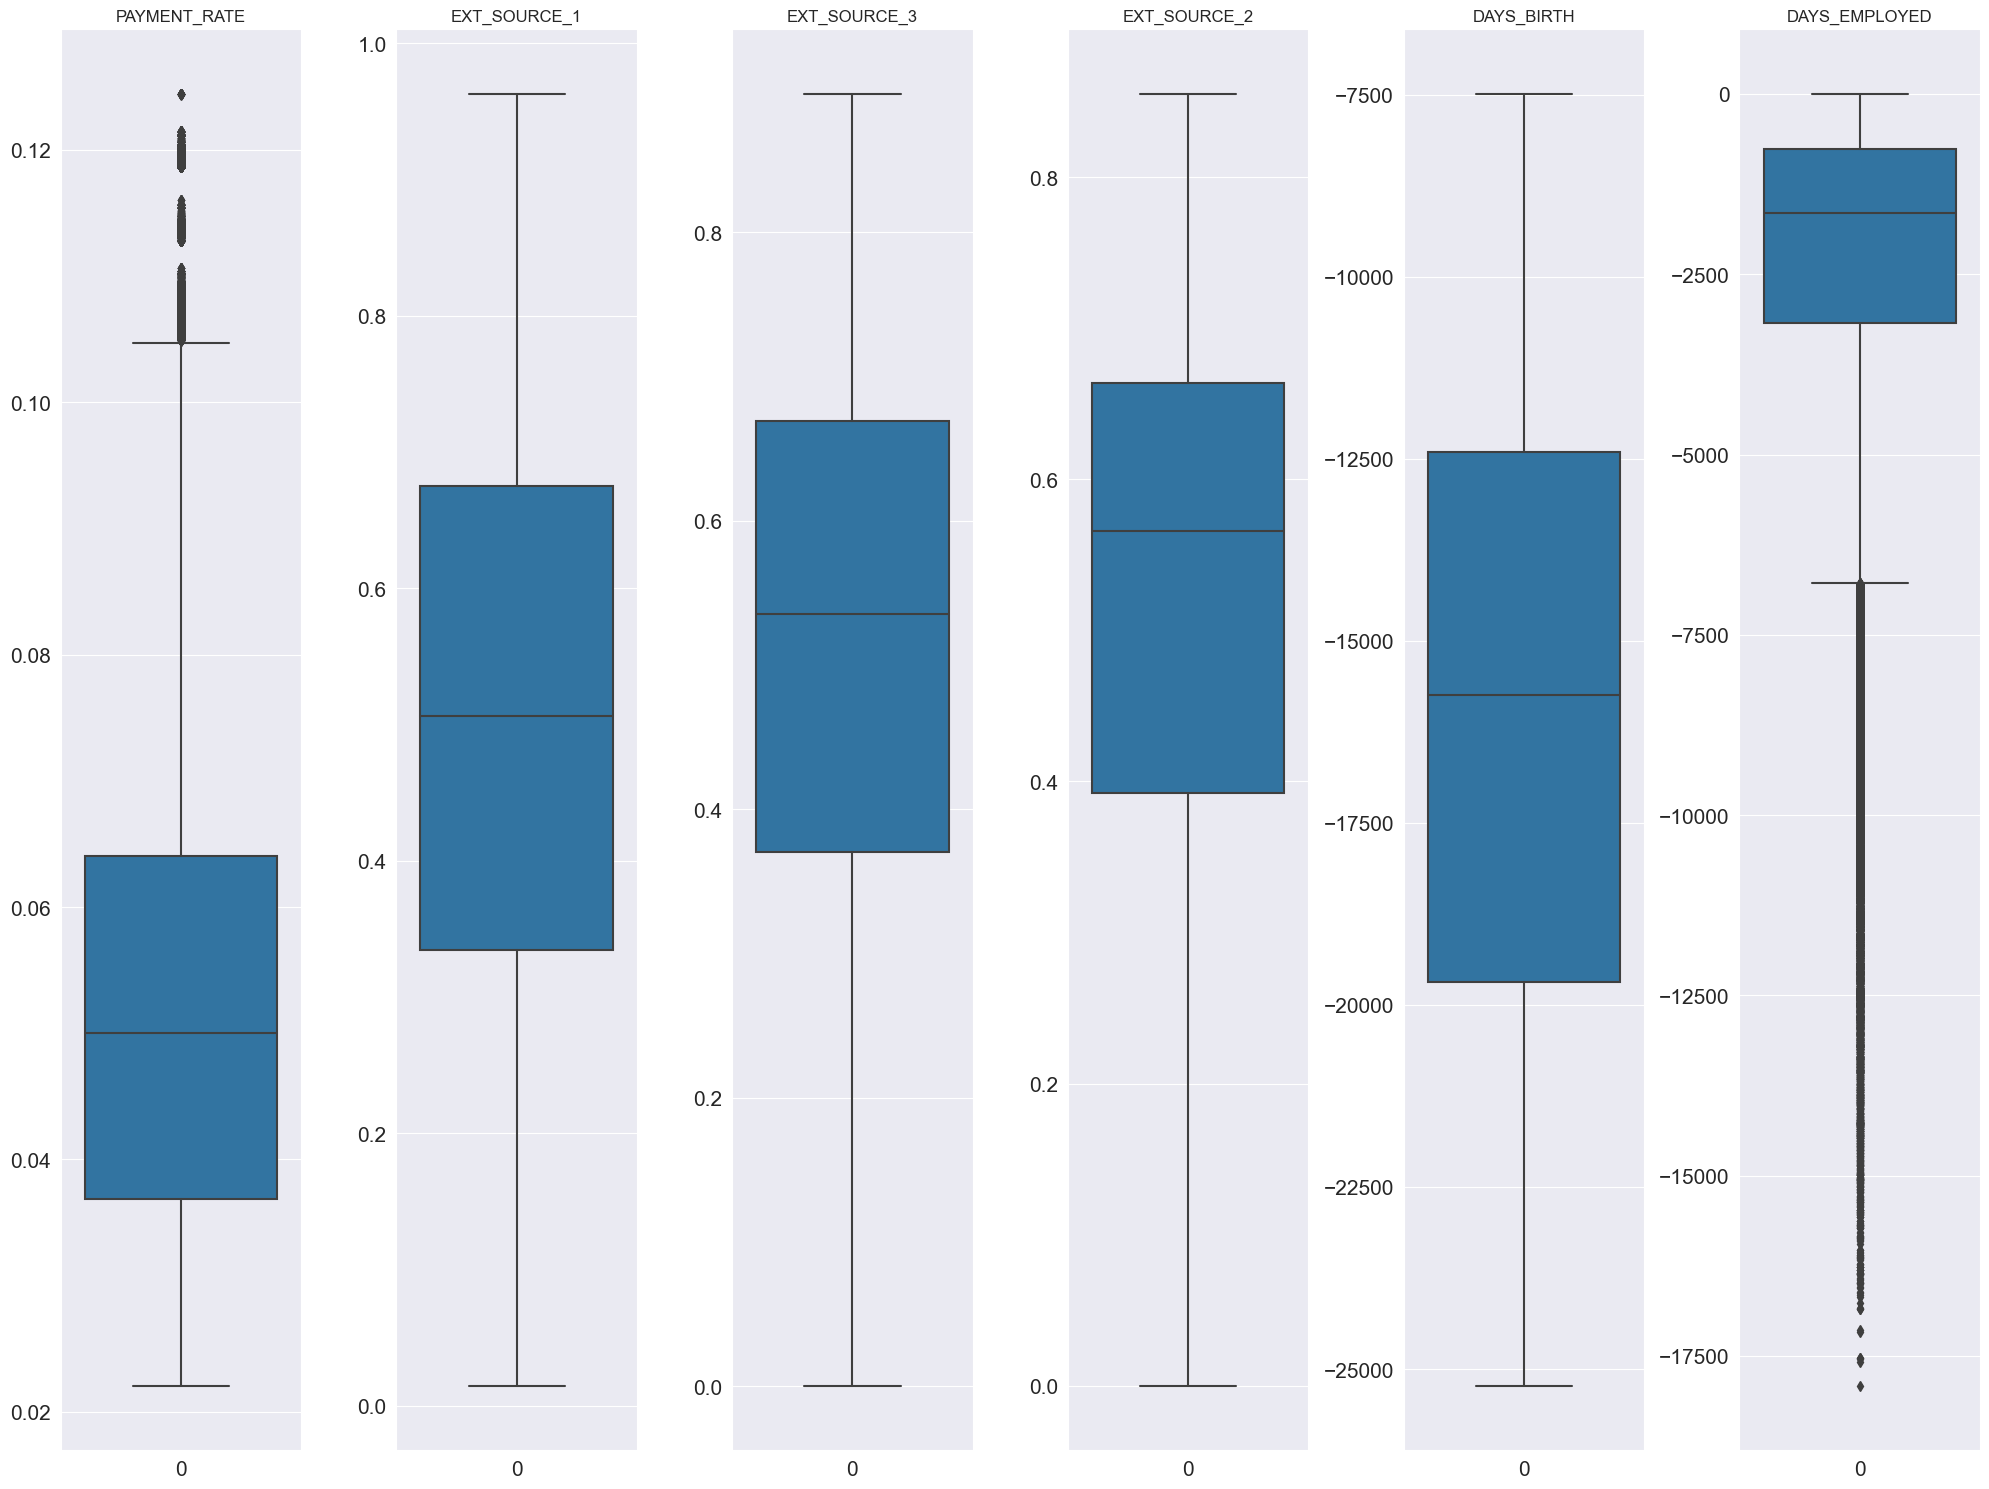

In [201]:

n = len(list_features)

fig = plt.figure(figsize=(20, 15))
for i, variable in enumerate(list_features):
    position = int('1{}{}'.format(n, i + 1))
    ax = fig.add_subplot(position)

    bp = sns.boxplot(data=df[variable].values, ax=ax)  # showfliers=False
    bp.set_title(variable)

plt.tight_layout()
plt.show()

In [196]:
df["PAYMENT_RATE"].values

array([0.06074927, 0.02759832, 0.05      , ..., 0.04423874, 0.05459232,
       0.07276667])